## 分类问题
- KNN算法
- 民主投票
- sklearn classification

- uniform 所有人投票权重为1
- distance 取决于待投票点的距离，越近权重值越大
  - 调节权重，效果明显

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

In [7]:
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [8]:
print(iris.data[:,0].shape)
iris.data[:,0]

(150,)


array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [21]:
# 前2个特征
x = iris.data[:, :2]
# print(x)
y = iris.target
step = 0.02

def knn_predict(weights):
    sample_count = 5
    clf = neighbors.KNeighborsClassifier(sample_count, weights=weights)
    clf.fit(x,y)
    
    # 第0个特征最小值，便于画图，要-1 扩大范围
    # 边框，x\y轴的范围
    x_min, x_max = x[:, 0].min() - 1, x[:,0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:,1].max() + 1
    
    # 生成一系列的点，网格
    x_range, y_range = np.meshgrid(
        np.arange(x_min, x_max, step),
        np.arange(y_min, y_max, step)
    )

    zinput = np.c_[x_range.ravel(), y_range.ravel()]
    # print(zinput)
    # 对网格中所有点 都预测
    z = clf.predict(zinput)
    z = z.reshape(x_range.shape) # 1维向量 变成矩阵
    # print(z)
    
    # 前景色 比较深
    color_map_front = ListedColormap(['#FF0000', '#00FF00','#0000FF'])
    color_map_back = ListedColormap(['#FF9999', '#99FF99','#9999FF'])
    # color map
    plt.pcolormesh(x_range, y_range, z, cmap=color_map_back)
    # 真实的点，点在图上
    plt.scatter(x[:,0], x[:,-1], c=y, cmap=color_map_front, edgecolors='k', s=20)
    plt.title(weights)
    plt.show()

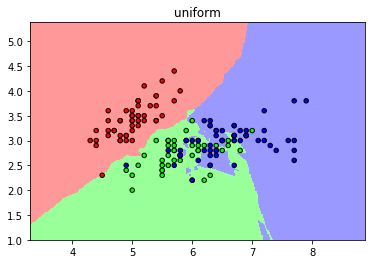

In [22]:
knn_predict('uniform')

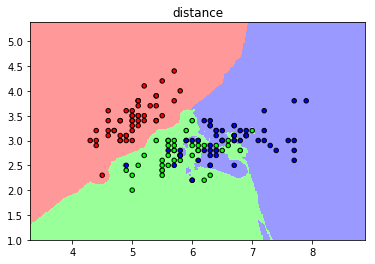

In [23]:
knn_predict('distance')

![](images/d1-2.png)